<a href="https://colab.research.google.com/github/mannat244/APKVerify/blob/main/DIPLab4444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# DIP Lab - 4**

1. Write and execute programs to perform logical operations on any two grayscale images.
 - a. AND operation between two images.
  - b. OR operation between two images.
   - c. Ex-OR operation between two images.
   - d. NOT operation

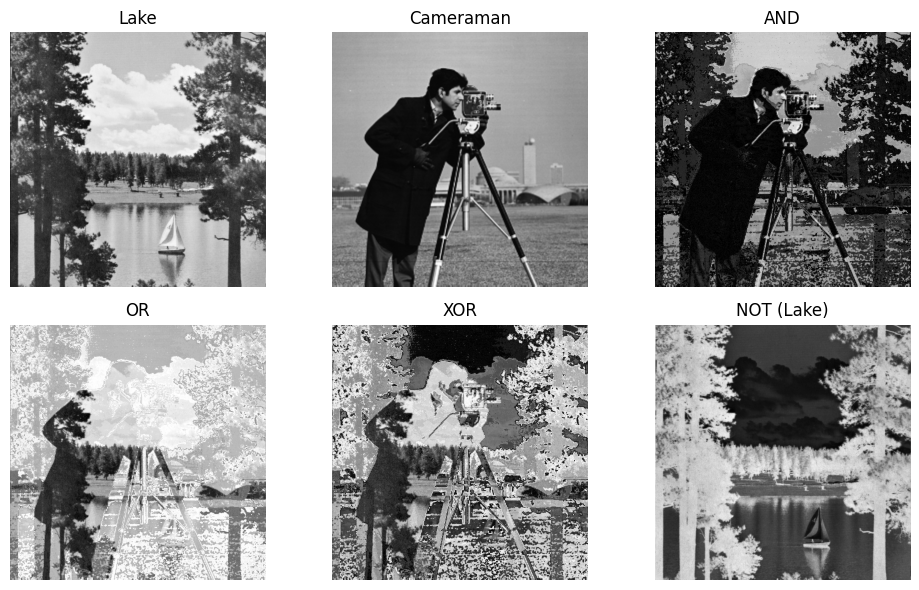

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read images in grayscale
img1 = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Resize second image to match first
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Logical operations
and_img = cv2.bitwise_and(img1, img2)
or_img  = cv2.bitwise_or(img1, img2)
xor_img = cv2.bitwise_xor(img1, img2)
not_img = cv2.bitwise_not(img1)

# Display all results together
plt.figure(figsize=(10,6))

plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray')
plt.title('Lake')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray')
plt.title('Cameraman')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(and_img, cmap='gray')
plt.title('AND')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(or_img, cmap='gray')
plt.title('OR')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(xor_img, cmap='gray')
plt.title('XOR')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(not_img, cmap='gray')
plt.title('NOT (Lake)')
plt.axis('off')

plt.tight_layout()
plt.show()


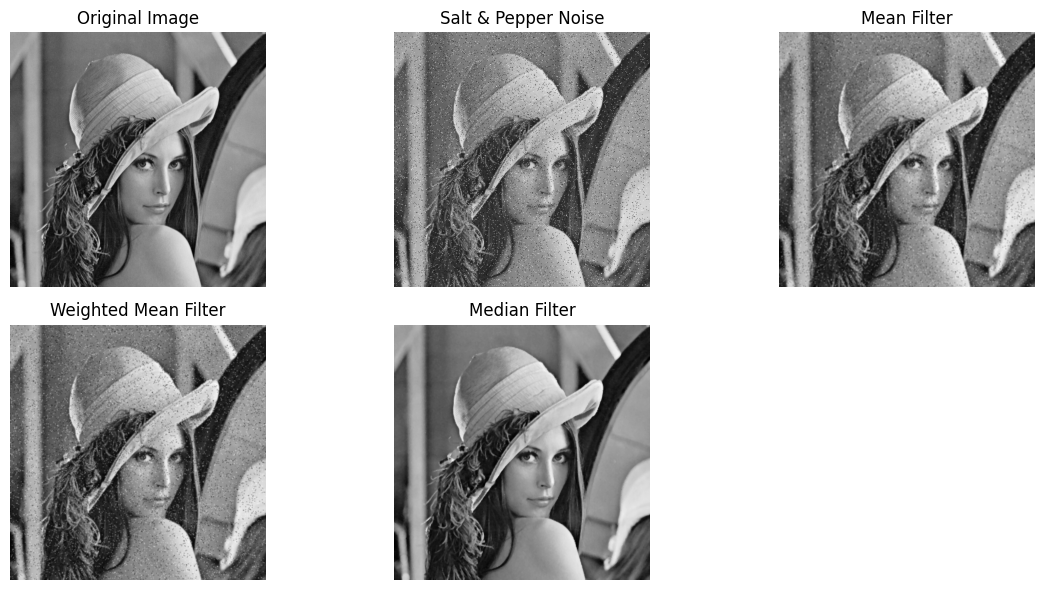

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread('/content/lena_gray_512.tif', cv2.IMREAD_GRAYSCALE)

# -----------------------------
# Add Salt & Pepper Noise
# -----------------------------
def add_salt_pepper_noise(image, prob=0.05):
    noisy = image.copy()
    total_pixels = image.size

    # Salt noise
    num_salt = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper noise
    num_pepper = int(prob * total_pixels / 2)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

noisy_img = add_salt_pepper_noise(img)

# -----------------------------
# Mean Filter
# -----------------------------
mean_filtered = cv2.blur(noisy_img, (3,3))

# -----------------------------
# Weighted Mean Filter
# -----------------------------
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16
weighted_mean = cv2.filter2D(noisy_img, -1, kernel)

# -----------------------------
# Median Filter
# -----------------------------
median_filtered = cv2.medianBlur(noisy_img, 3)

# -----------------------------
# Display Results
# -----------------------------
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(weighted_mean, cmap='gray')
plt.title("Weighted Mean Filter")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


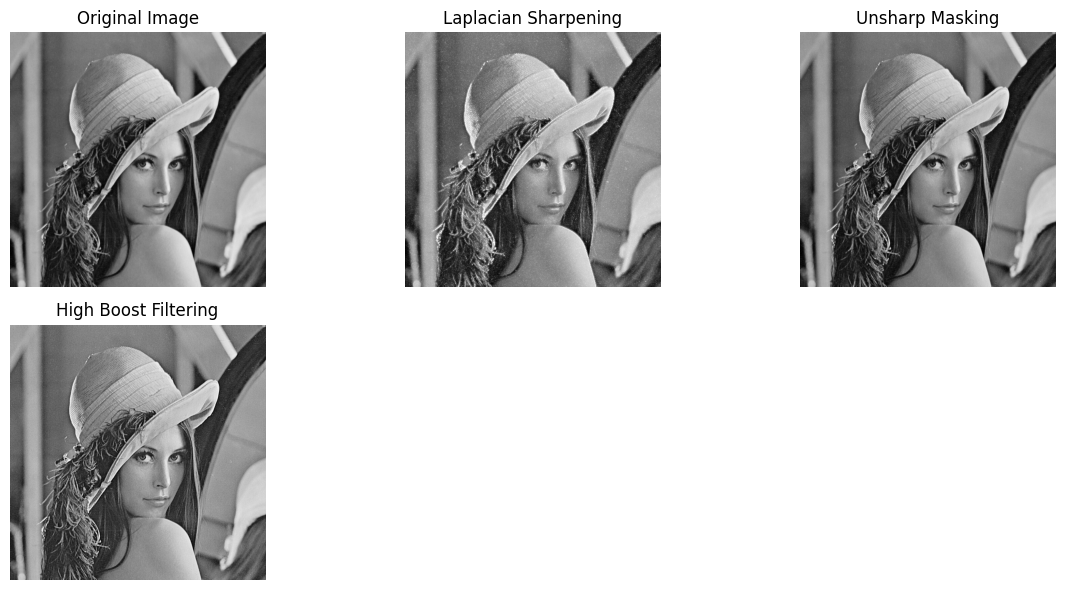

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread('/content/lena_gray_512.tif', cv2.IMREAD_GRAYSCALE)

# -----------------------------
# a) Laplacian Filter
# -----------------------------
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Sharpened image using Laplacian
laplacian_sharp = cv2.add(img, laplacian)

# -----------------------------
# b) Unsharp Masking
# -----------------------------
blur = cv2.GaussianBlur(img, (5,5), 0)
mask = cv2.subtract(img, blur)
unsharp = cv2.add(img, mask)

# -----------------------------
# c) High Boost Filtering
# -----------------------------
k = 1.5  # Boost factor (>1)
high_boost = cv2.addWeighted(img, 1 + k, blur, -k, 0)

# -----------------------------
# Display Results
# -----------------------------
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(laplacian_sharp, cmap='gray')
plt.title("Laplacian Sharpening")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(unsharp, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(high_boost, cmap='gray')
plt.title("High Boost Filtering")
plt.axis('off')

plt.tight_layout()
plt.show()
